[1] 0

[1] 0


Call:
lm(formula = SalePrice ~ X1stFlrSF, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-460330  -36494  -13164   36291  414547 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 36173.447   5245.728   6.896 7.95e-12 ***
X1stFlrSF     124.501      4.282  29.078  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 63220 on 1458 degrees of freedom
Multiple R-squared:  0.3671,	Adjusted R-squared:  0.3666 
F-statistic: 845.5 on 1 and 1458 DF,  p-value: < 2.2e-16


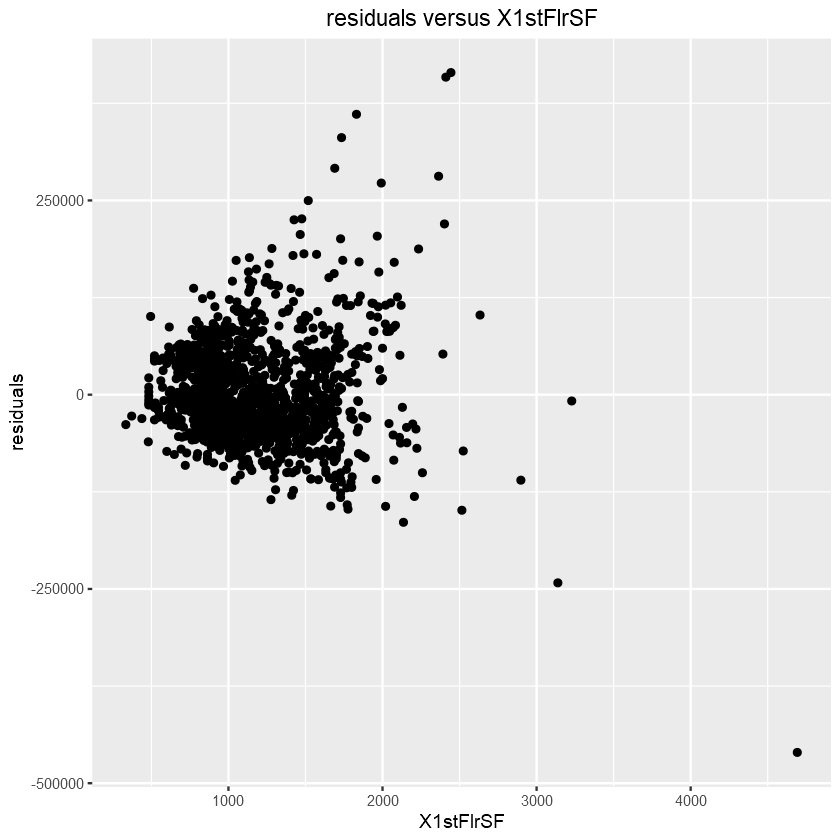

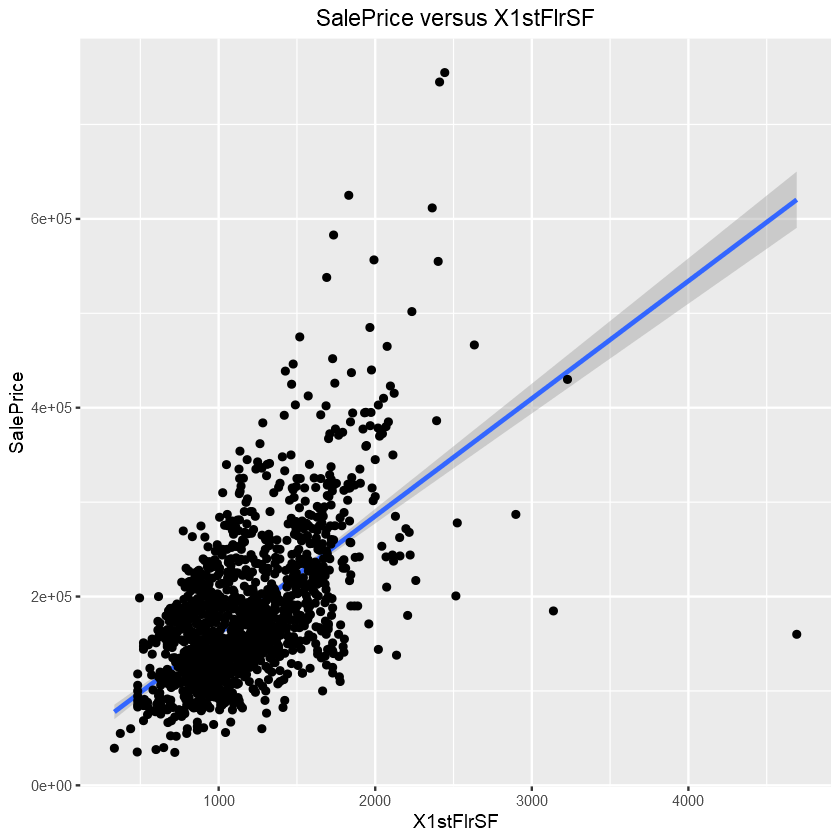


Call:
lm(formula = SalePrice ~ X1stFlrSF, data = data.tr1.5)

Residuals:
    Min      1Q  Median      3Q     Max 
-200389  -36225  -11977   37018  402110 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 25610.954   5323.156   4.811 1.66e-06 ***
X1stFlrSF     133.911      4.371  30.634  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 61990 on 1458 degrees of freedom
Multiple R-squared:  0.3916,	Adjusted R-squared:  0.3912 
F-statistic: 938.4 on 1 and 1458 DF,  p-value: < 2.2e-16



Call:
lm(formula = SalePrice ~ X1stFlrSF, data = data.tr1)

Residuals:
    Min      1Q  Median      3Q     Max 
-177723  -36905  -11787   36539  396997 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 21714.295   5406.476   4.016 6.21e-05 ***
X1stFlrSF     137.598      4.475  30.751  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 61420 on 1451 degrees of freedom
Multiple R-squared:  0.3946,	Adjusted R-squared:  0.3941 
F-statistic: 945.6 on 1 and 1451 DF,  p-value: < 2.2e-16



Call:
lm(formula = SalePrice ~ X1stFlrSF, data = data.tr1, weights = SalePrice)

Weighted Residuals:
      Min        1Q    Median        3Q       Max 
-85301651 -20511764  -9859185   8072119 290365735 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1469.814   6490.918  -0.226    0.821    
X1stFlrSF     172.789      4.944  34.952   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 31590000 on 1451 degrees of freedom
Multiple R-squared:  0.4571,	Adjusted R-squared:  0.4567 
F-statistic:  1222 on 1 and 1451 DF,  p-value: < 2.2e-16


adj.outlier,remove.outlier,weighted.remove.outlier
0.3945628,0.3915915,0.4570936


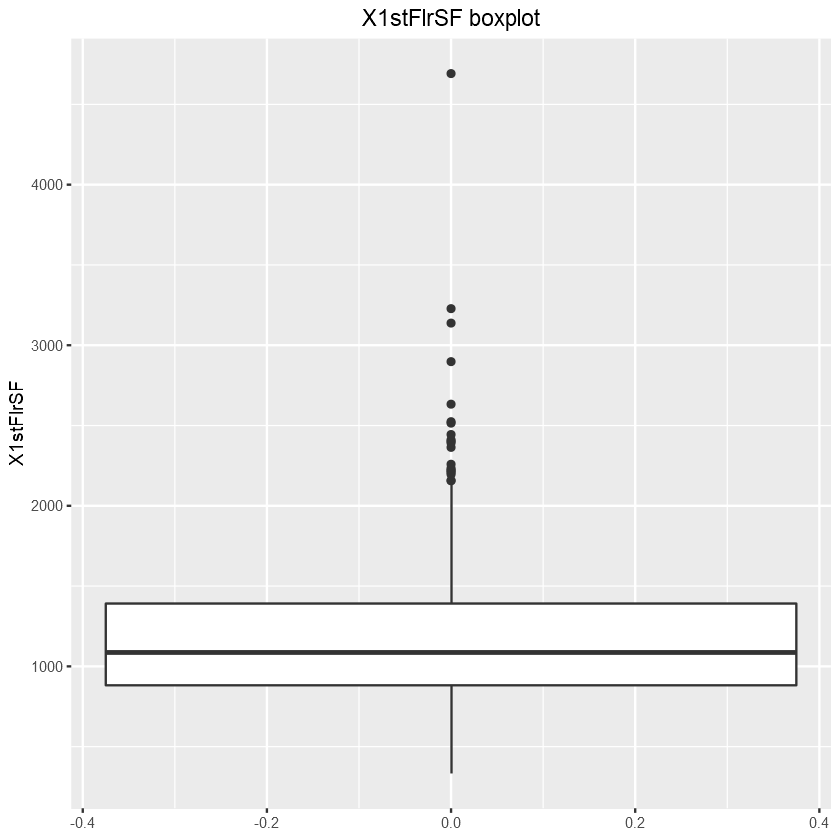

In [3]:
#origin
library(ggplot2)
dat=read.csv('C:\\Users\\coco40725\\Documents\\GitHub\\2nd-ML100Days\\data\\house.train.csv')

sum(is.na(dat$SalePrice)) #check if there is any NA in SalePrice 
sum(is.na(dat$X1stFlrSF)) #check if there is any NA in X1stFlrSF 

fit1=lm(SalePrice~X1stFlrSF,data=dat)
summary(fit1)

# residual plot
res.data=data.frame(residuals=fit1$residuals,X1stFlrSF=dat$X1stFlrSF)
res.plot=ggplot(data=res.data,aes(x=X1stFlrSF,y=residuals))+geom_point()+ggtitle('residuals versus X1stFlrSF')+
  theme(plot.title = element_text(hjust = 0.5))
res.plot # 根據residuals plot ，發現其呈現喇叭型趨勢，代表error的variance可能不是constant

# line 
pred.data=data.frame(SalePrice=dat$SalePrice,X1stFlrSF=dat$X1stFlrSF)
fit.plot=ggplot(data=pred.data,aes(x=X1stFlrSF,y=SalePrice))+
  geom_smooth(method = 'lm',data=pred.data)+ggtitle('SalePrice versus X1stFlrSF')+
  theme(plot.title = element_text(hjust = 0.5))+geom_point()
fit.plot ## X1stFlrSF越大 var(SalePrice) 則越大-->error的variance 可能不是常數

X1stFlrSF=dat$X1stFlrSF
SalePrice=dat$SalePrice
## 作業一: 第一種處理: 調正(1stFlrSF) 的上下限
box.p=ggplot()+geom_boxplot(aes(y=X1stFlrSF),data=as.data.frame(X1stFlrSF))+
  ggtitle('X1stFlrSF boxplot')+theme(plot.title = element_text(hjust = 0.5))
box.p
# 根據boxplot 調整X1stFlrSF>2500 的資料點
loc.2500=which(X1stFlrSF>2500)
X1stFlrSF.adjust=X1stFlrSF
X1stFlrSF.adjust[loc.2500]=2500
data.tr1.5=data.frame(X1stFlrSF=X1stFlrSF.adjust,SalePrice=SalePrice)
fit1.5=lm(SalePrice~X1stFlrSF,data=data.tr1.5)
summary(fit1.5)

## 作業二: 第二種處理: 丟掉(1stFlrSF) 的離群值

# 根據boxplot 去除X1stFlrSF>2500 的資料點
X1stFlrSF.select=X1stFlrSF[-loc.2500]
SalePrice.select=SalePrice[-loc.2500]
data.tr1=data.frame(X1stFlrSF=X1stFlrSF.select,SalePrice=SalePrice.select)
fit2=lm(SalePrice~X1stFlrSF,data=data.tr1)
summary(fit2)


## 修改為weight least square
fit3=lm(SalePrice~X1stFlrSF,data=data.tr1,weights = SalePrice)
summary(fit3)

result=data.frame(adj.outlier=summary(fit2)$r.squared,
                  remove.outlier=summary(fit1.5)$r.squared,
                  weighted.remove.outlier=summary(fit3)$r.squared)
result